<h1><center>Finding Heavy Traffic Indicators on I-94 </h1>

#### Project goal:
This project aims to determine major indicators of heavy traffic on the I-94 Interstate highway. These indicators can be weather types (such as rain, snow) or time (like month, day, or hour), etc.

#### Dataset:
The traffic data was collected by a station located approximately midway between Minneapolis and Saint Paul. It was mentioned that they recorded westbound traffic (cars moving from east to west) from 2012-2018, so the result of our analysis will be about the westbound traffic only instead of the entire I-94 highway.

The dataset can be found in [this link](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

## I. Reading and exploring data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [4]:
traffic.tail(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


As we can see in the output, the data type of the ‘date_time’ column is currently "object", so our first step will be converting it to DateTime format.

## II. Cleaning data

In [6]:
# Converting date_time colume to DateTime format 

traffic.date_time = pd.to_datetime(traffic.date_time)

traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [7]:
# Finding duplicates

duplicate = traffic[traffic.duplicated()==True]

duplicate

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18697,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23851,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26784,None,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26980,None,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27171,None,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
28879,None,267.890,0.0,0.0,90,Snow,light snow,2016-12-06 18:00:00,4520
29268,None,254.220,0.0,0.0,1,Clear,sky is clear,2016-12-19 00:00:00,420
34711,None,295.010,0.0,0.0,40,Clouds,scattered clouds,2017-06-21 11:00:00,4808
34967,None,292.840,0.0,0.0,1,Clear,sky is clear,2017-06-30 10:00:00,4638
34969,None,294.520,0.0,0.0,1,Clear,sky is clear,2017-06-30 11:00:00,4725


In [8]:
# Randomly checking some records to confirm duplicate

traffic[(traffic.date_time == '2017-06-30 13:00:00')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
34972,None,296.95,0.0,0.0,1,Thunderstorm,thunderstorm,2017-06-30 13:00:00,5263
34973,None,296.95,0.0,0.0,1,Thunderstorm,thunderstorm,2017-06-30 13:00:00,5263


In [9]:
# Isolating duplicate from the dataset

traffic = traffic[traffic.duplicated()==False]

traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [10]:
len(traffic) + len(duplicate)

48204

#### Now we have a dataset with 48187 unique records and no null value. The data looks quite clean now, so we will start analyzing it. 

## III. Analyzing data

Let's plot a histogram to examine the traffic volume distribution.

<AxesSubplot:ylabel='Frequency'>

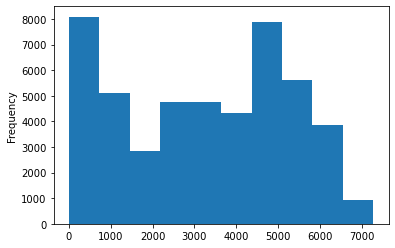

In [11]:
traffic.traffic_volume.plot.hist()

In [12]:
traffic.traffic_volume.describe()

count    48187.000000
mean      3259.618134
std       1986.954465
min          0.000000
25%       1192.500000
50%       3379.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

<p style='background:yellow'>Some observations:
<br>- The most frequent traffic volume was ~8000, which were in the range of (0 to 1000) and (4500 to 5000)
<br>- Minimum traffic volume was 0, and the maximum was 7280
<br>- About 25% of the time, there were only 1193 cars or fewer, and about 25% of the time, the traffic volume was four times higher (4933 cars or more)
<br>
<br>Our first guess is that there's a possibility that traffic volume was influenced by daytime and nighttime. So we will use the date_time column to find if there are any trends associated with a particular time of the day.</p>

### 1. Comparing traffic during day and night time

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [13]:
traffic['hour'] = traffic.date_time.dt.hour
traffic.head(1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9


In [14]:
daytime = traffic[(traffic.hour>=7) & (traffic.hour<19)]

daytime.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11


In [15]:
nighttime = traffic[(traffic.hour<7) | (traffic.hour>=19)]

nighttime.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,19
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21


In [16]:
len(daytime) + len(nighttime)

48187

#### Now that we have a separate dataset for daytime and nighttime, let's look at the histograms of traffic volume side-by-side.

Text(0.5, 0, 'Traffic volume')

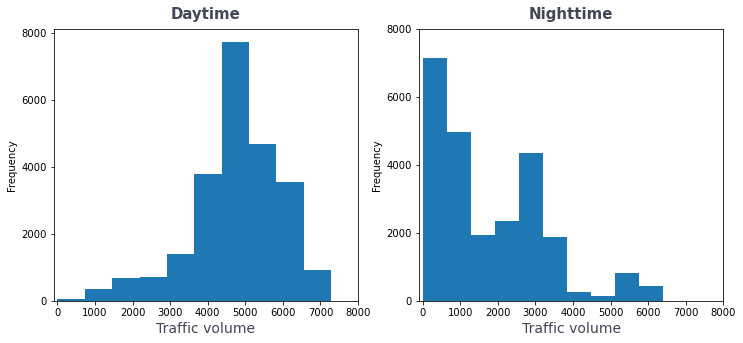

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
daytime.traffic_volume.plot.hist()
plt.yticks([0, 2000, 4000, 6000, 8000])
plt.xlim(-100, 8000)
plt.title('Daytime', fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.xlabel('Traffic volume',fontsize=14,color='#434656')

plt.subplot(1,2,2)
nighttime.traffic_volume.plot.hist(xlim = (0, 7000), ylim = (0, 8000))
plt.yticks([0, 2000, 4000, 6000, 8000])
plt.xlim(-100, 8000)
plt.title('Nighttime', fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.xlabel('Traffic volume',fontsize=14,color='#434656')

In [18]:
daytime.traffic_volume.describe()

count    23867.000000
mean      4762.033351
std       1174.763788
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [19]:
nighttime.traffic_volume.describe()

count    24320.000000
mean      1785.187870
std       1441.840234
min          0.000000
25%        530.000000
50%       1286.500000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

<p style='background:yellow'>We can see that the daytime histogram is left-skew, suggesting that most traffic volume values were high. Based on the statistic, 75% of the time, more than 4352 cars on average pass the station every hour. On the other hand, the nighttime histogram is right-skew, which means that most of the traffic volume values were low; 75% of the time, the number of cars on the road was not higher than 2,819.
<br>
<br>Although there were still times at night when traffic volume was over 6000 cars per hour, the traffic at night is generally low. Our goal is to find indicators of heavy traffic, so moving forward, we'll only focus on the daytime data.</p>

### 2. Analyzing daytime traffic volume - Time indicator

One of the possible reasons for heavy traffic is time. There might be more (or less) people on the road during certain months, dates, or times. We'll continue to analyze the data according to 3 different time frames:
- Month
- Day of the week
- Time of day

#### Comparing average traffic by month

In [20]:
daytime['month'] = daytime.date_time.dt.month

daytime.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10


In [21]:
traffic_by_month = daytime.groupby('month').mean().traffic_volume
traffic_by_month 

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4897.963395
7     4595.035744
8     4928.302035
9     4870.517723
10    4921.395402
11    4704.094319
12    4374.970398
Name: traffic_volume, dtype: float64

Text(0.5, 0, 'Month')

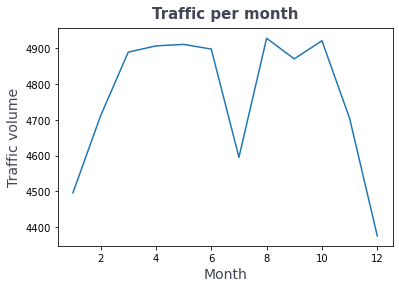

In [22]:
traffic_by_month.plot()
plt.title('Traffic per month',fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.ylabel('Traffic volume',fontsize=14,color='#434656')
plt.xlabel('Month',fontsize=14,color='#434656')

<p style='background:yellow'>Traffic volume was at its lowest in December. It looks like from November to February, the traffic was lighter than during other months of the year. This was probably due to holidays, people reduced their need to travel. 
<br> It's a bit strange to see a sudden drop around July. So let's look at July data throughout different years to see whether it's normal.</p>

In [23]:
traffic_july = daytime[daytime.month == 7]
traffic_july['year'] = traffic_july.date_time.dt.year

traffic_july.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,month,year
7350,None,289.15,0.0,0.0,75,Clouds,broken clouds,2013-07-01 07:00:00,6783,7,7,2013
7351,None,291.59,0.0,0.0,1,Clear,sky is clear,2013-07-01 08:00:00,5742,8,7,2013
7352,None,294.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 09:00:00,4764,9,7,2013


<AxesSubplot:xlabel='year'>

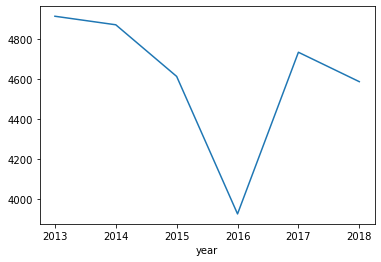

In [24]:
traffic_july = traffic_july.groupby('year').mean().traffic_volume
traffic_july.plot()

<p style='background:yellow'>Generally, we can see that the traffic in July was also heavy (above 4500). The only exception was in 2016 when the number went down to below 4000. Because this was rare (only happend once), it's safe to say that during Mar to Oct, the traffic was heavier compared to the rest of the year.<p>

#### Comparing average traffic by day and time

Text(0.5, 0, 'Day of week')

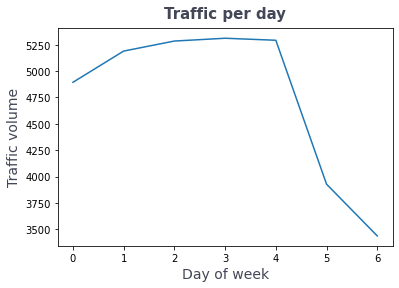

In [25]:
daytime['day_of_week'] = daytime.date_time.dt.dayofweek

traffic_by_day = daytime.groupby('day_of_week').mean().traffic_volume
traffic_by_day.plot()
plt.title('Traffic per day',fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.ylabel('Traffic volume',fontsize=14,color='#434656')
plt.xlabel('Day of week',fontsize=14,color='#434656')

<p style='background:yellow'>From the graph, we can see heavier traffic volume during business days (Monday to Friday) and lighter during the weekend (Saturday and Sunday).</p>

In [41]:
traffic_on_week_day = daytime[(daytime.day_of_week <6)]
traffic_on_week_day = traffic_on_week_day.groupby('hour').mean().traffic_volume

traffic_on_weekend = daytime[(daytime.day_of_week >= 6)]
traffic_on_weekend = traffic_on_weekend.groupby('hour').mean().traffic_volume

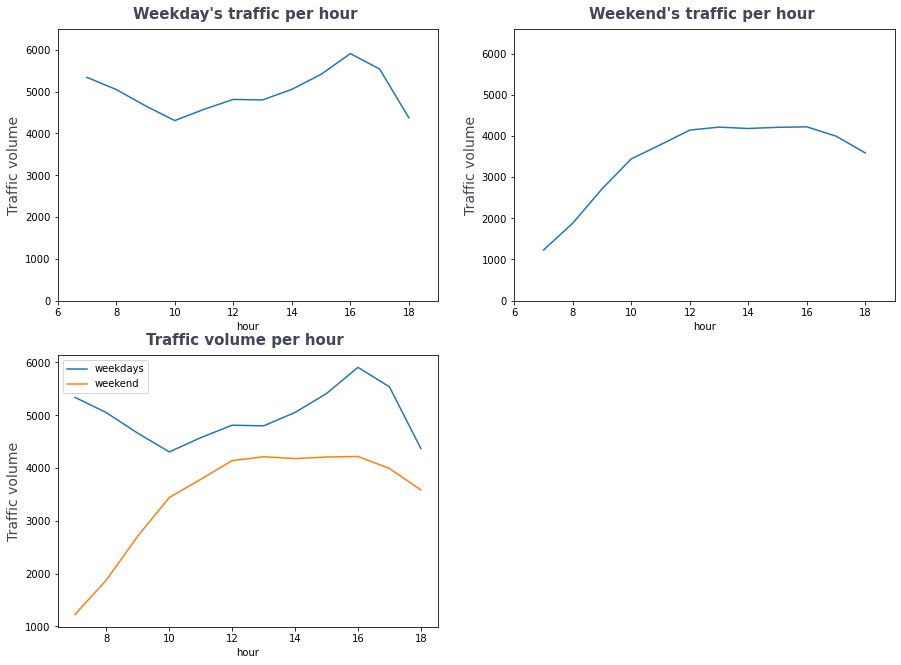

In [67]:
plt.figure(figsize = (15,11))

plt.subplot(2,2,1)
traffic_on_working_day.plot(ylim=(0,6500), xlim=(6,19))
plt.title('Weekday\'s traffic per hour ',fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.ylabel('Traffic volume',fontsize=14,color='#434656')
#plt.xlabel('Hour',fontsize=14,color='#434656')

plt.subplot(2,2,2)
traffic_on_weekend.plot(ylim=(0,6600), xlim=(6,19))
plt.title('Weekend\'s traffic per hour ',fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.ylabel('Traffic volume',fontsize=14,color='#434656')
#plt.xlabel('Hour',fontsize=14,color='#434656')

plt.subplot(2,2,3)
traffic_on_working_day.plot(label='weekdays')
traffic_on_weekend.plot(label='weekend')
plt.ylabel('Traffic volume',fontsize=14,color='#434656')
plt.title('Traffic volume per hour ',fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.legend()

<p style='background:yellow'>In general, we can see that the traffic volume was high during weekdays. The rush hours were around 7h and 16h, when it can reach up to 6000 cars on the road per hour — this was probably the time people traveled to and from work.
<br>On weekends, traffic volume was low, especially in the morning. It started to increase and reached its peak around 12h-16h, but comparing to weekday, the volume was relatively low (not even reach 4000).</p>

### 3. Analyzing daytime traffic volume - Weather indicator

Another indicator that could influence traffic is the weather. Our dataset contains some information relating to the weather:
- temp
- rain_1h
- snow_1h
- clouds_all
- weather_main
- weather_description

Some of these columns are numerical. So let’s look at the correlation table to see if we can find a significant correlation between traffic volume and the weather.

In [72]:
daytime.corr()['traffic_volume']

temp              0.128248
rain_1h           0.003697
snow_1h           0.001266
clouds_all       -0.032969
traffic_volume    1.000000
hour              0.172793
month            -0.022286
day_of_week      -0.416535
Name: traffic_volume, dtype: float64

<p style = 'background:yellow'>We can see that the correlation was the highest between 'temp' and 'traffic volume', which was also just 0.128. For other conditions like rain, snow, and clouds, it showed a really weak correlation.</p>

Let's generate some scatter plots to visualize the correlation between them

Text(0, 0.5, 'Clouds')

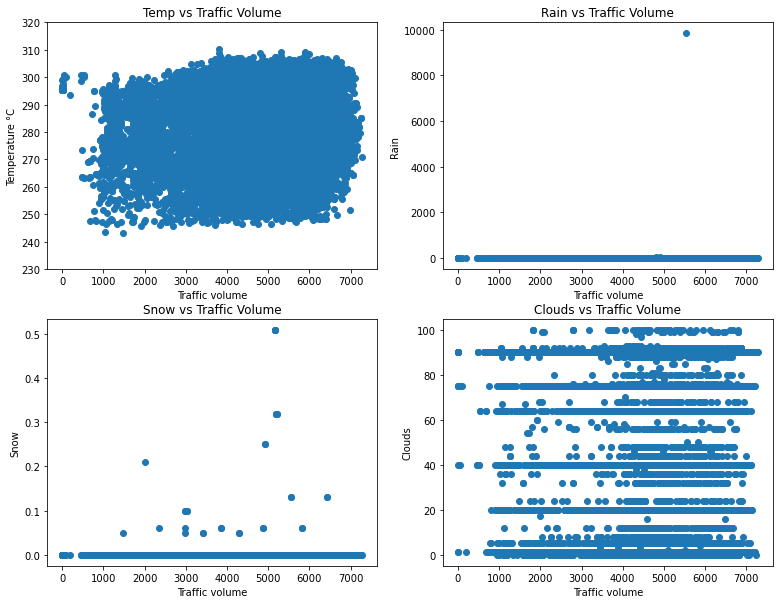

In [105]:
plt.figure(figsize = (13,10))

# Correlation between 'temp' and 'traffic_volume'

plt.subplot(2,2,1)
plt.scatter(daytime.traffic_volume, daytime.temp)
plt.ylim(230, 320)
plt.title("Temp vs Traffic Volume")
plt.xlabel('Traffic volume')
plt.ylabel('Temperature °C')

# Correlation between 'rain' and 'traffic_volume'
plt.subplot(2,2,2)
plt.scatter(daytime.traffic_volume, daytime.rain_1h)
plt.title("Rain vs Traffic Volume")
plt.xlabel('Traffic volume')
plt.ylabel('Rain')

# Correlation between 'snow' and 'traffic_volume'
plt.subplot(2,2,3)
plt.scatter(daytime.traffic_volume, daytime.snow_1h)
plt.title("Snow vs Traffic Volume")
plt.xlabel('Traffic volume')
plt.ylabel('Snow')

# Correlation between 'cloud' and 'traffic_volume'
plt.subplot(2,2,4)
plt.scatter(daytime.traffic_volume, daytime.clouds_all)
plt.title("Clouds vs Traffic Volume")
plt.xlabel('Traffic volume')
plt.ylabel('Clouds')

<p style = 'background:yellow'>We can see that, even for temp, which showed the strongest correlation in the correlation table, it doesn't look like a significant indicator of heavy traffic. Similarly, the other 3 columns display no solid correlation with traffic volume.<p>

Let's continue by looking at the remaining two weather-related columns: 
- weather_main
- weather_description

<AxesSubplot:ylabel='weather_main'>

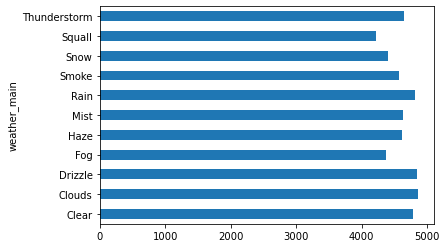

In [114]:
# Finding traffic_volume average based on weather_main column

by_weather_main = daytime.groupby('weather_main').mean().traffic_volume
by_weather_main.plot.barh()

<p style = 'background:yellow'>
We see no significant difference from the bar chart suggesting any single weather-related indicator causing heavy traffic. There was no weather type where traffic volume exceeded 5,000 cars. 
</p>

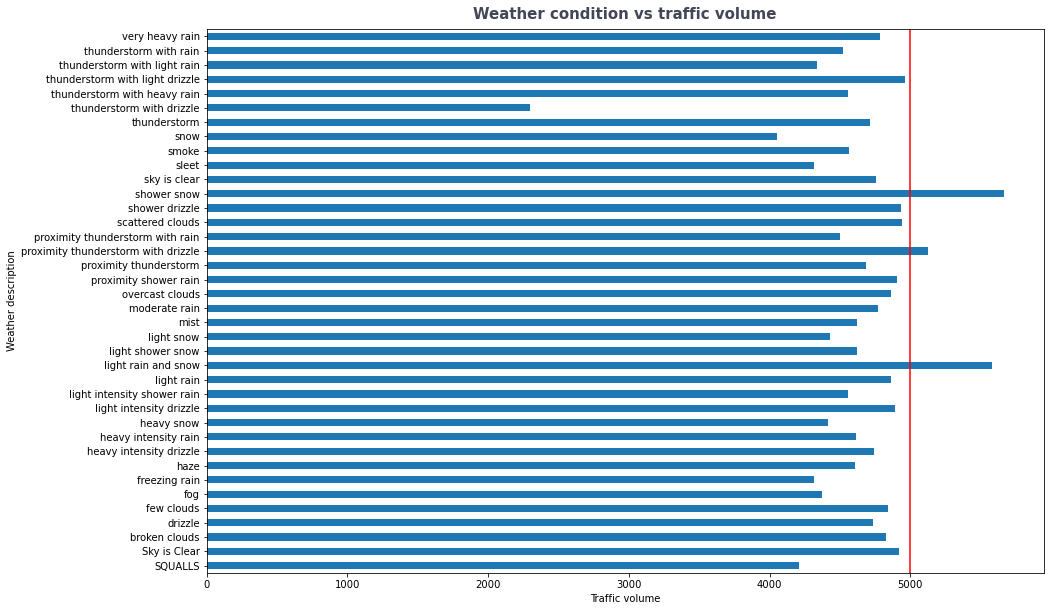

In [134]:
# Finding traffic_volume average based on weather_description column

plt.figure(figsize = (15,10))
by_weather_description = daytime.groupby('weather_description').mean().traffic_volume
by_weather_description.plot.barh()
plt.title('Weather condition vs traffic volume',fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.xlabel('Traffic volume')
plt.ylabel('Weather description')
plt.axvline(5000,color ='red')

<p style = 'background:yellow'>There are 3 weather conditions in which traffic volume exceeds 5000 cars:
<br>- shower snow
<br>- proximity thunderstorm with drizzle
<br>- light rain and snow
<br>It's not very clear why these types of weather resulted in bad traffic. Maybe when the weather was not good, people would prefer to travel by car instead of walking or riding a bike.</p>

# III. Conclusion

<p> In this project, we tried to find the main indicators of heavy traffic on the I-94 Interstate highway. We managed to find two major types of heavy traffic indicators: time and weather.

1. Time Indicators:
- Traffic was busier during daytime in comparison to nighttime
- Traffic was usually heavier from March to October, compared to the rest of the year
- During weekdays, the traffic volume was high, especially during rush hours (around 7:00 and 16:00)

2. Weather Indicators: three weather patterns can be associated with heavier traffic:
- Shower snow 
- Proximity thunderstorm with drizzles
- Light rain and snow 
</p>